In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# Teste giren sagirdlerin Orta Riyaziyyat ballari
math_mean = df.groupby('test preparation course')['math score'].mean()
math_mean

test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64

In [7]:
# Teste giren sagirdlerin Orta Oxu ballari
reading_mean = df.groupby('test preparation course')['reading score'].mean()
reading_mean

test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64

In [8]:
# Teste giren sagirdlerin Orta Yazi ballari
writing_mean = df.groupby('test preparation course')['writing score'].mean()
writing_mean

test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64

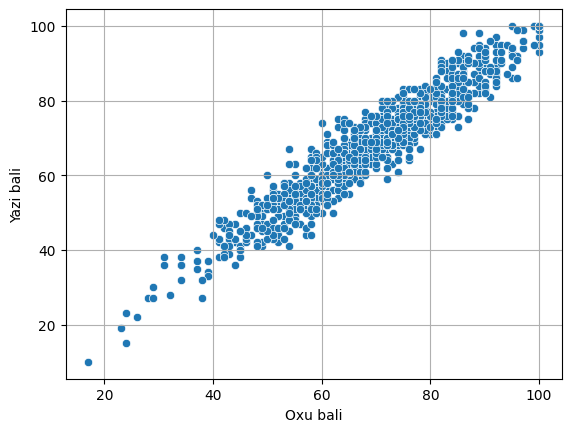

In [9]:
# Oxu ile yazmagin elaqesi
sns.scatterplot(x = df['reading score'], y = df['writing score'] , data = df)
plt.xlabel("Oxu bali")
plt.ylabel("Yazi bali")
plt.grid()
plt.show()

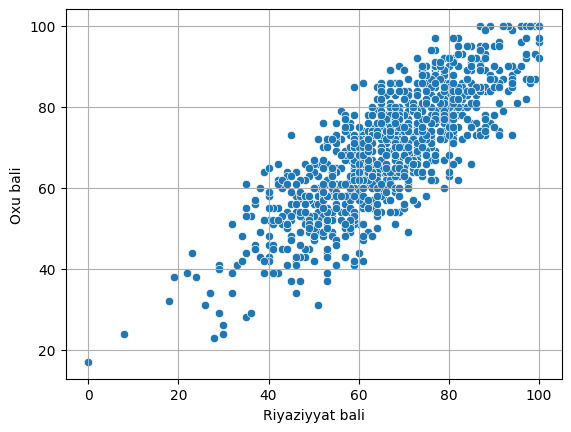

In [10]:
# Riyaziyyat ile Oxumagin elaqesi
sns.scatterplot(x = df['math score'], y = df['reading score'] , data = df)
plt.xlabel("Riyaziyyat bali")
plt.ylabel("Oxu bali")
plt.grid()
plt.show()

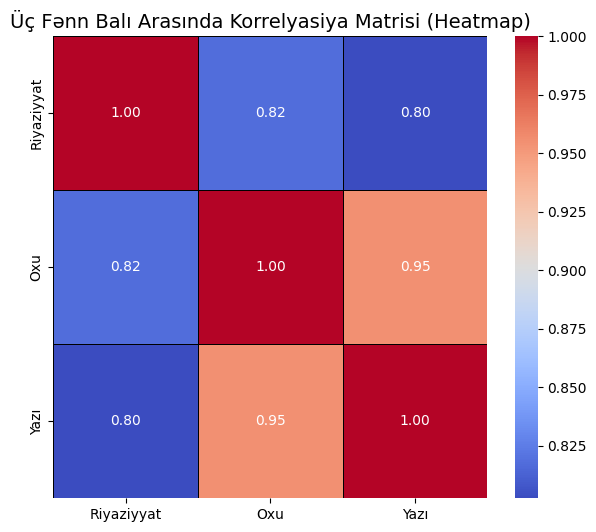

In [11]:
score_cols = ['math score', 'reading score', 'writing score']
df_scores = df[score_cols]

correlation_matrix = df_scores.corr()

azeri_labels = {
    'math score': 'Riyaziyyat',
    'reading score': 'Oxu',
    'writing score': 'Yazı'
}
correlation_matrix.rename(columns=azeri_labels, index=azeri_labels, inplace=True)

plt.figure(figsize=(7, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,              
    cmap='coolwarm',         
    fmt=".2f",              
    linewidths=.5,           
    linecolor='black'
)
plt.title('Üç Fənn Balı Arasında Korrelyasiya Matrisi (Heatmap)', fontsize=14)
plt.show()

In [12]:
# Cins e gore lunch menyusu
gender_of_lunch = df.groupby('gender')['lunch'].value_counts()
gender_of_lunch

gender  lunch       
female  standard        329
        free/reduced    189
male    standard        316
        free/reduced    166
Name: count, dtype: int64

In [13]:
gender_of_lunch.unstack()

lunch,free/reduced,standard
gender,,
female,189,329
male,166,316


In [14]:
ethnicity_of_lunch = df.groupby('race/ethnicity')['lunch'].value_counts()
ethnicity_of_lunch

race/ethnicity  lunch       
group A         standard         53
                free/reduced     36
group B         standard        121
                free/reduced     69
group C         standard        205
                free/reduced    114
group D         standard        167
                free/reduced     95
group E         standard         99
                free/reduced     41
Name: count, dtype: int64

In [15]:
ethnicity_of_lunch.unstack()

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


In [16]:
ethnicity_of_math = df.groupby('race/ethnicity')['math score'].mean()
ethnicity_of_math

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [17]:
ethnicity_of_math.reset_index()

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


In [18]:
ethnicity_of_reading = df.groupby('race/ethnicity')['reading score'].mean()
ethnicity_of_reading

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

In [19]:
ethnicity_of_reading.reset_index()

,race/ethnicity,reading score
0,group A,64.674157
1,group B,67.352632
2,group C,69.103448
3,group D,70.030534
4,group E,73.028571


In [20]:
ethnicity_of_writing = df.groupby('race/ethnicity')['writing score'].mean()
ethnicity_of_writing

race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64

In [21]:
ethnicity_of_writing.reset_index()

,race/ethnicity,writing score
0,group A,62.674157
1,group B,65.600000
2,group C,67.827586
3,group D,70.145038
4,group E,71.407143


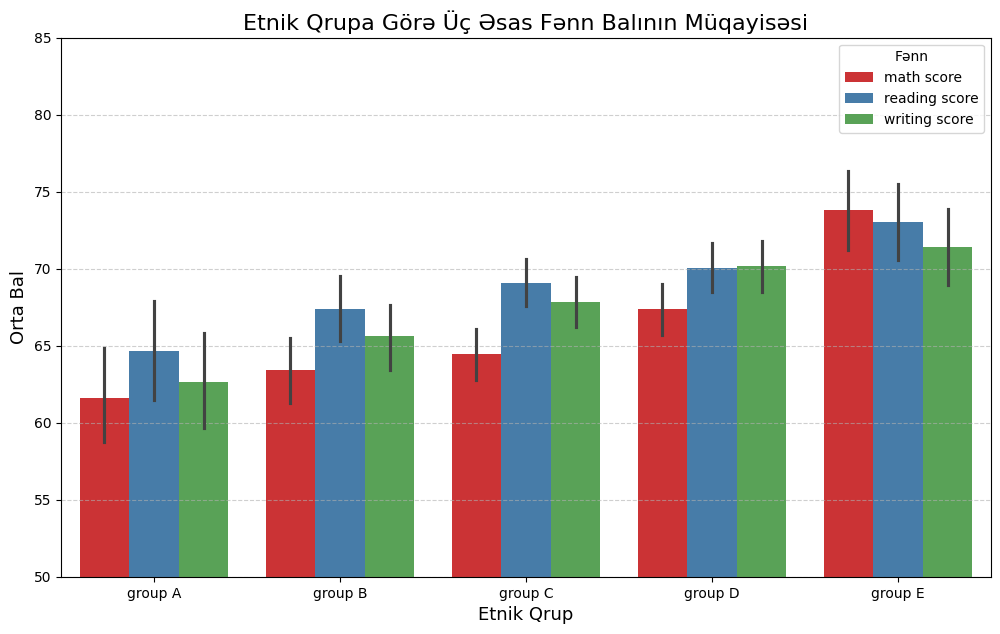

In [22]:
score_cols = ['math score', 'reading score', 'writing score']
df_long = df.melt(
    id_vars=['race/ethnicity'], 
    value_vars=score_cols,
    var_name='Fenn',            
    value_name='Bal'            
)

plt.figure(figsize=(12, 7))

sns.barplot(
    data=df_long,
    x='race/ethnicity',    
    y='Bal',               
    hue='Fenn',            
    palette='Set1',        
    order=['group A', 'group B', 'group C', 'group D', 'group E']
)

plt.title('Etnik Qrupa Görə Üç Əsas Fənn Balının Müqayisəsi', fontsize=16)
plt.xlabel('Etnik Qrup', fontsize=13)
plt.ylabel('Orta Bal', fontsize=13)
plt.ylim(50, 85) 
plt.legend(title='Fənn') 
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

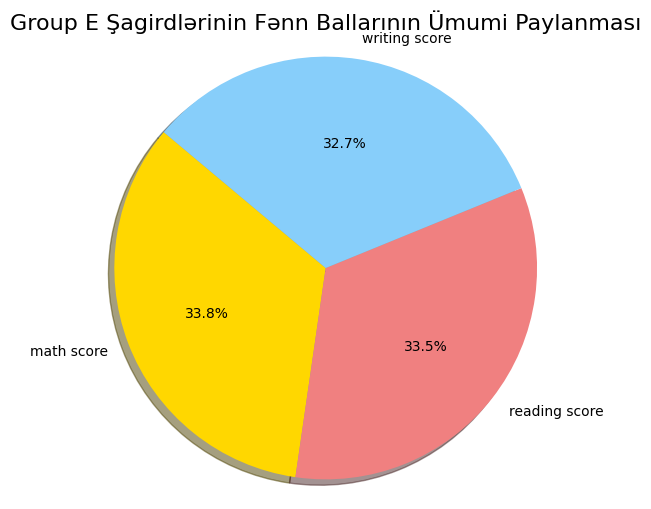

In [23]:
group_e_data = df[df['race/ethnicity'] == 'group E']
group_e_scores_mean = group_e_data[['math score', 'reading score', 'writing score']].mean()

plt.figure(figsize=(6, 6))
plt.pie(
    group_e_scores_mean.values, 
    labels=group_e_scores_mean.index, 
    autopct='%1.1f%%',             
    startangle=140,               
    shadow=True,                  
    colors=['gold', 'lightcoral', 'lightskyblue'] )
plt.title('Group E Şagirdlərinin Fənn Ballarının Ümumi Paylanması', fontsize=16)
plt.axis('equal') 
plt.show()

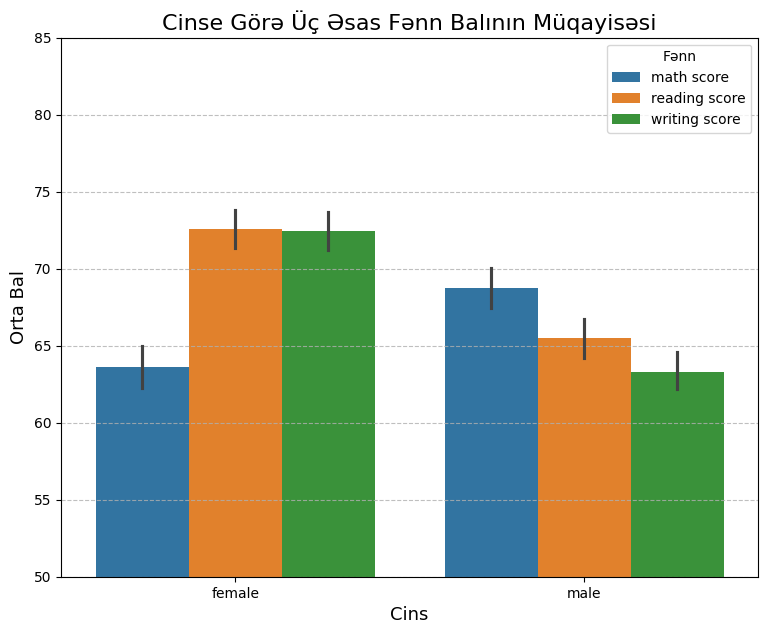

In [24]:
score_cols = ['math score', 'reading score', 'writing score']
df_long = df.melt(
    id_vars=['gender'], 
    value_vars=score_cols,
    var_name='Fenn',            
    value_name='Bal'            
)
plt.figure(figsize=(9,7))
sns.barplot(
    data=df_long,
    x='gender',    
    y='Bal',               
    hue='Fenn',                    
    order=['female','male']
)
plt.title('Cinse Görə Üç Əsas Fənn Balının Müqayisəsi', fontsize=16)
plt.xlabel('Cins', fontsize=13)
plt.ylabel('Orta Bal', fontsize=13)
plt.ylim(50, 85) 
plt.legend(title='Fənn') 
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

In [25]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

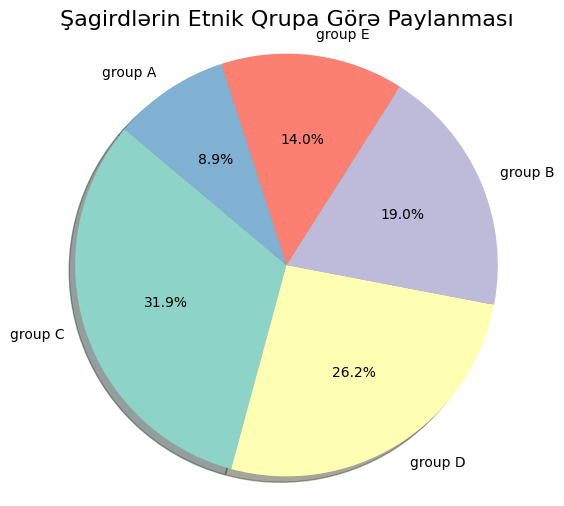

In [26]:
race_counts = df['race/ethnicity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    race_counts.values,            
    labels=race_counts.index,     
    autopct='%1.1f%%',            
    startangle=140,              
    shadow=True,                
    colors=plt.cm.Set3.colors)
plt.title('Şagirdlərin Etnik Qrupa Görə Paylanması', fontsize=16)
plt.axis('equal') 
plt.show()